In [1]:
%load_ext autoreload
%autoreload 2
%env MKL_NUM_THREADS=1

env: MKL_NUM_THREADS=1


# Ranfom Forest on FATS

Load data and features

In [2]:
import sys
from joblib import load, dump
from os.path import join, exists
sys.path.append("../libs")
from vvv_utils import parse_metadata, parse_light_curve_data, vvv_path, get_train_test_ids

# df_meta = parse_metadata(experiment="ALL", merge_subclasses=True)
with open("metadata4rf.pkl", "rb") as f:
    df_meta = load(f)
train_idx, test_idx = get_train_test_ids(df_meta)

In [3]:
#with open(join(vvv_path, "features/features_fats_demo.pkl"), "rb") as f:
with open("/run/media/amorales/392cf315-7e84-4743-a143-b375a0604f7d/amorales/UACh/tesis/pickles/features_fats_all.pkl", "rb") as f:
    features = load(f)
    
display(features.head(5))
print(features.shape)

,CAR_sigma,CAR_mean,Meanvariance,Mean,PercentDifferenceFluxPercentile,PercentAmplitude,Skew,AndersonDarling,Std,Rcs,...,Eta_e,Period_fit_v2,PeriodPowerRate,Psi_CS_v2,Psi_eta_v2,StructureFunction_index_21,Pvar,StructureFunction_index_31,ExcessVar,IAR_phi
oid,,,,,,,,,,,,,,,,,,,,,
b221_201_22183,0.029854,0.129690,0.004019,12.969043,0.011624,0.007798,0.299589,1.000000,0.052119,0.129087,...,0.085593,0.199446,0.006845,0.269202,0.174647,1.410958,1.0,1.567173,0.000015,0.395942
b221_205_41463,0.014141,0.122816,0.003381,12.281559,0.011656,0.008952,0.319367,0.996356,0.041528,0.160954,...,0.037231,0.088535,0.003884,0.239514,0.603361,2.110024,1.0,3.264560,0.000009,0.657367
b232_614_24529,0.012187,0.126573,0.002282,12.657314,0.007116,0.006595,-0.595523,0.997524,0.028881,0.152810,...,0.316498,0.010538,0.009164,0.198155,0.860321,1.734619,1.0,2.415084,0.000004,0.570542
b233_201_30278,0.012476,0.130966,0.002302,13.096551,0.007336,0.007901,0.331045,0.926431,0.030146,0.136696,...,0.024233,0.005611,0.201240,0.220840,1.208544,1.551493,1.0,1.957971,0.000004,0.283583
b233_201_16631,0.027895,3.682501,0.003355,12.692367,0.009962,0.011822,0.456372,0.999898,0.042577,0.144025,...,0.165085,0.139859,0.004803,0.278597,0.372389,1.692609,1.0,2.254031,0.000010,0.769216


(88454, 54)


In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

/home/phuijse/.conda/envs/astro/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/phuijse/.conda/envs/astro/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Balanced Random Forest Classifier

Grid search cross validation to select best parameters in terms of best f1_macro score

Save best model for future use

Download model from Gdrive because it is too big for github

Get model predictions and show confussion matrix on test set

In [13]:
if not exists('../models/best_rf_balanced.pkl.xz'):
    !pip install gdown
    import gdown
    gdown.download("https://drive.google.com/u/1/uc?export=download&confirm=7p4B&id=1QzNS-wCCsPmEpbz0wjcEUqjsUvy5AkRL", 
                   "../models/best_rf_balanced.pkl.xz")

with open("../models/best_rf_balanced.pkl.xz", "rb") as f:
    best_model = load(f)    

from sklearn.metrics import confusion_matrix, classification_report
y_pred = best_model.predict(features.loc[test_idx].fillna(0).values)
y_true = df_meta.loc[test_idx]["label"]
cm = confusion_matrix(y_pred,y_true,labels=['binary', 'rrlyrae', 'cepheid'])


/home/amorales/anaconda3/envs/astro/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.21.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
from joblib import load
with open("/run/media/amorales/392cf315-7e84-4743-a143-b375a0604f7d/amorales/UACh/tesis/pickles/rf_metrics.pkl", "rb") as f:
    metricsrf, cmsrf = load(f)

In [6]:
stars = ['ECL','RRL','CEP']
#cmap = sb.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sb.light_palette("seagreen", as_cmap=True)
sb.set(font_scale=1.7)

In [7]:
CM = np.zeros((5,3,3))

In [8]:
for i in range(5):
    CM[i,:,:] = cmsrf[i,:,:].astype('float') / cmsrf[i,:,:].sum(axis=1)[:, np.newaxis]

In [9]:
print("|     Precision     |       Recall      |      F1-score     |")
for i in range(3):
    print('& %.3f' % metricsrf[:,i].mean(),'$\pm$ %.3f' % metricsrf[:,i].std(),end=' ')


|     Precision     |       Recall      |      F1-score     |
& 0.707 $\pm$ 0.001 & 0.915 $\pm$ 0.001 & 0.767 $\pm$ 0.001 

<IPython.core.display.Javascript object>


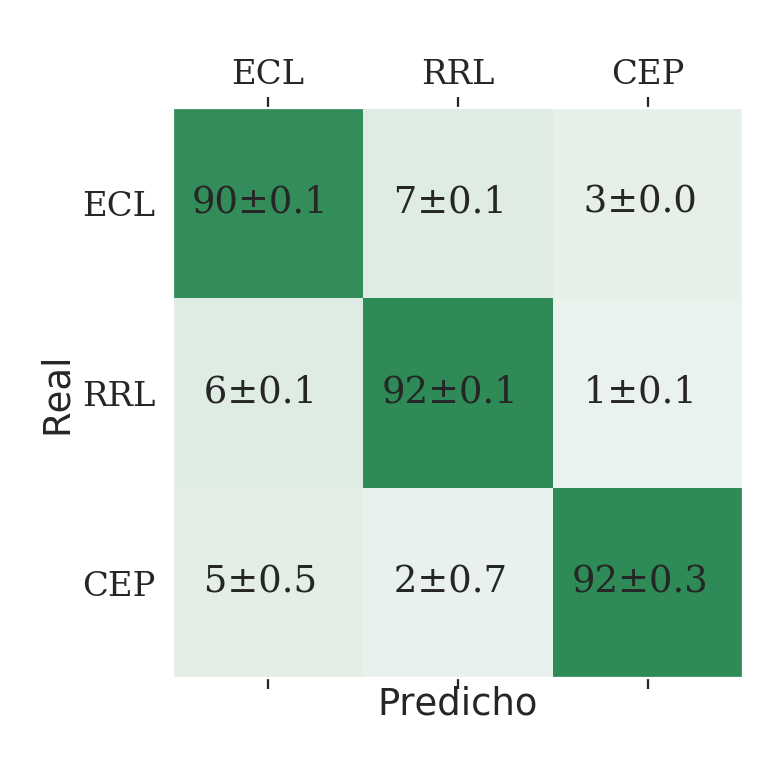

In [11]:
cm_avg = np.mean(CM,axis=0)
cm_std = np.std(CM,axis=0)
#cm_labels = pd.DataFrame([[f'{cm_avg[i,j]:0.3f}±{cm_std[i,j]:0.3f}' for i in range(3)] for j in range(3)])
fig, ax = plt.subplots(figsize=(6, 6),tight_layout=True)
ax.matshow(cm_avg, cmap=cmap)
ax.set_xticks(range(3))
ax.set_xticklabels(stars,family='serif')
ax.set_yticks(range(3))
ax.set_yticklabels(stars,family='serif')
ax.set_xlabel('Predicho')
ax.set_ylabel('Real')
for i in range(3):
    for j in range(3):
        ax.text(i-0.4, j+0.05, f'{100*cm_avg[j,i]:2.0f}±{100*cm_std[j,i]:0.1f}',family='serif')
ax.grid(False)

              precision    recall  f1-score   support

      binary       0.98      0.89      0.93      6790
     cepheid       0.32      0.93      0.48       149
     rrlyrae       0.79      0.93      0.85      1909

    accuracy                           0.90      8848
   macro avg       0.70      0.92      0.75      8848
weighted avg       0.93      0.90      0.91      8848



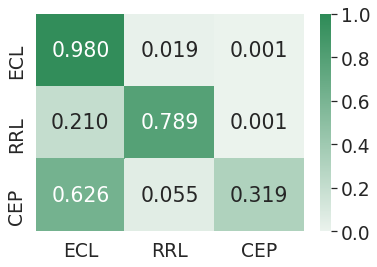

In [14]:
#print(y_pred.__len__()/5)
#cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#display(cm)
stars = ['ECL','RRL','CEP']
df_cm = pd.DataFrame(cm, index=stars, columns=stars)
#cmap = sb.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
cmap = sb.light_palette("seagreen", as_cmap=True)
sb.set(font_scale=1.7)
sb.heatmap(df_cm, annot=True,vmin=0.0, vmax=1.0, fmt='.3f',cmap=cmap,linecolor='black')
print(classification_report(y_true, y_pred))

# Classical RF with ADASYN augmentation

In [ ]:
parameters = {'aug__sampling_strategy': ('minority', 'not majority'), 
              'aug__n_neighbors': [3, 5, 7],
              'rf__class_weight': (None, 'balanced')}

#parameters = {'aug__sampling_strategy': ('not minority', 'all'), 
#              'aug__k_neighbors': [3, 5, 7],
#              'rf__class_weight': (None, 'balanced', 'balanced_subsample')}

aug = ADASYN()
rf = RandomForestClassifier(criterion='gini', n_estimators=500, max_depth=10)
pipe = Pipeline([('aug', aug), ('rf', rf)])

cv = GridSearchCV(pipe, parameters, cv=5, verbose=2, n_jobs=8, scoring='f1_macro')
cv.fit(features.loc[train_idx].fillna(0).values, df_meta.loc[train_idx]["label"])

print(cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed: 22.2min


In [11]:
print(cv.best_params_)

{'aug__n_neighbors': 7, 'aug__sampling_strategy': 'minority', 'rf__class_weight': 'balanced'}


In [13]:
print("Compressing best model")
with open("../models/best_rf_adasyn.pkl.xz", "wb") as f:
    dump(cv.best_estimator_['rf'], f, compress=('xz', 6))

Compressing best model


In [14]:
#gdown.download("https://drive.google.com/u/1/uc?export=download&confirm=7p4B&id=1QzNS-wCCsPmEpbz0wjcEUqjsUvy5AkRL", 
#               "best_rf_balanced.pkl.xz")

with open("../models/best_rf_adasyn.pkl.xz", "rb") as f:
    best_model = load(f)    

from sklearn.metrics import confusion_matrix

confusion_matrix(best_model.predict(features.loc[test_idx].fillna(0).values), 
                 df_meta.loc[test_idx]["label"],
                 labels=['binary', 'rrlyrae', 'cepheid'])

array([[6114,   93,   12],
       [ 504, 1799,    3],
       [ 172,   17,  134]])